<a href="https://colab.research.google.com/github/tonyhaya/tonyhaya/blob/main/pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from torch import nn
import numpy as np

#Conhecendo ML como usar Pytorch
* Isto está formatado como código
* Data prepara dados e carregar
* Construir modelos
* Alimentat o modelo
* Fazer previsãoes e avaliar modelo
* salvar e carregar o modelo
* Contruir tudo



In [2]:
casa={
    1: "xícara",
    2: "bola"}
casa[2]

'bola'

## Dado (preparando e carregando)

pode ser qualquer coisa

* Excel speadsheet
* Imagens  qualquer tipo
* videos
* Audio
* DNA
* Texto

In [3]:
class Hello_world():
  def __init__(self,num1,num2):
    self.num1=num1
    self.num2=num2
  def soma(self):
    so=self.num1+self.num2
    return so

In [4]:
a=Hello_world(2,1)

In [5]:
a.soma()

3

In [6]:
weight=0.7
bias=.3
x=torch.arange(0,1,.02).unsqueeze(dim=1)
y=weight*x+bias
print(x[:10])
print(y[:10])
len(x),len(y)

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
tensor([[0.3000],
        [0.3140],
        [0.3280],
        [0.3420],
        [0.3560],
        [0.3700],
        [0.3840],
        [0.3980],
        [0.4120],
        [0.4260]])


(50, 50)

In [7]:
split_data=int(.8*len(x))
x_train,y_train=x[:split_data],y[:split_data]
x_test,y_test=x[split_data:],y[split_data:]

In [8]:
def plot_predictions(train_data=x_train
                     ,test_data=x_test
                     ,train_label=y_train
                     ,test_label=y_test
                     ,predictions=None):
 plt.figure(figsize=(10,7))
 #azul training
 plt.scatter(train_data,train_label,c="b",s=4,label="Training data")
 #Preto teste
 plt.scatter(test_data,test_label,c="y",s=4,label="Testing data")
 if predictions is not None:
   plt.scatter(test_data,predictions,c='r',label="Predictions")
 plt.legend(prop={"size":14})

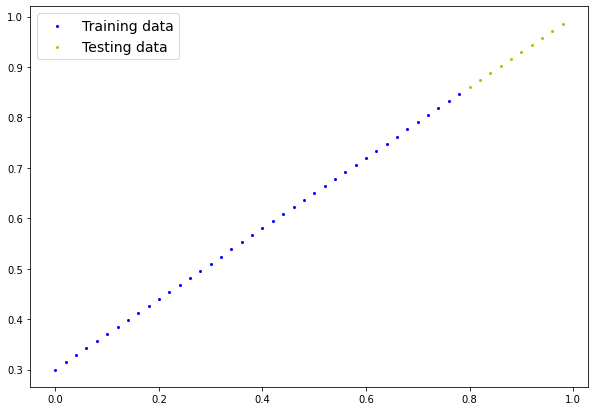

In [9]:
plot_predictions()

 ## Build a model

In [16]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights= nn.Parameter(torch.randn(1
                                           ,requires_grad=True
                                           ,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True
                                           ,dtype=torch.float))
  def forward(self,x: torch.Tensor)-> torch.Tensor:
    return self.weights*x+self.bias

In [11]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
model_0.state_dict(),list(model_0.parameters())

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 [Parameter containing:
  tensor([0.3367], requires_grad=True), Parameter containing:
  tensor([0.1288], requires_grad=True)])

### Making prediction with torch.inference_mode()
Check features and labels if is ok

In [12]:
# Make prediction with model

with torch.inference_mode():
  y_pred=model_0(x_test)
y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

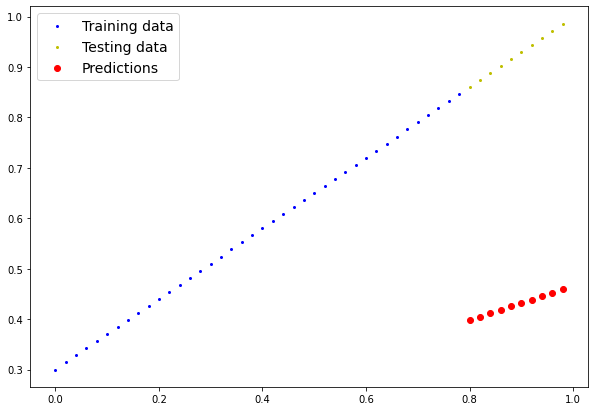

In [13]:
plot_predictions(predictions=y_pred)

## Loss function and optimizer

In [17]:
#setup both
Loss_fn=nn.L1Loss()
Optimizer= torch.optim.SGD(params=model_0.parameters(),
                           lr=0.01)